In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import DeltaVar as dv
import SpectralSynthesis as ss
from tqdm import tqdm

In [2]:
L = 10**(np.linspace(-2,-0.01, 100))
#L = 10**(np.linspace(-1.8,-0.01, 100))
#L_range = 10**(np.linspace(-1.5,-0.75,100))
L_range = 10**(np.linspace(-1.8,-1.25,100))
v = 1.5
DATASET = "Testing"
DATADIR = 'D:/ExponentiatedNonPeriodicNoisy/Testing'
print(DATADIR)

D:/ExponentiatedNonPeriodicNoisy/Testing


In [3]:
H_actual = np.loadtxt(DATADIR+'/labels/labels.txt')[:,0]
sigma_actual = np.loadtxt(DATADIR+'/labels/labels.txt')[:,1]

print(H_actual,sigma_actual)

[0.81647732 0.67725888 0.37683244 ... 0.18330174 0.74456015 0.63540898] [1.10987981 1.09585004 1.61691835 ... 2.83424495 0.18202581 0.33415455]


100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [6:23:12<00:00, 11.50s/it]


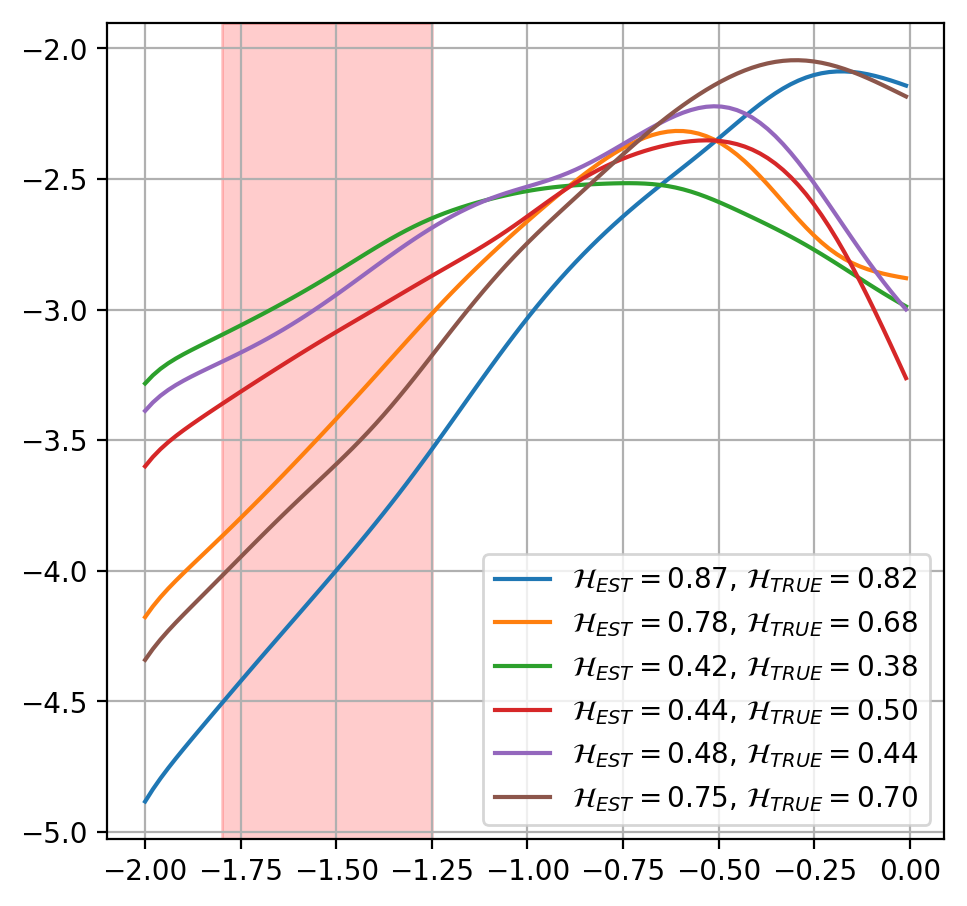

In [4]:
FILEPATH = DATADIR+'/features'

H_predicted = []
c=0
f,ax = plt.subplots(figsize=(1080/200,1080/200),dpi=200)
for img in tqdm(os.listdir(FILEPATH)):
    img_array = np.loadtxt(os.path.join(FILEPATH,img))
    sigma_d = [dv.DeltaVar(img_array, l, v, periodicity = False) for l in L]
    sigma_d_range = [dv.DeltaVar(img_array, l, v, periodicity = False) for l in L_range]
    h = dv.HurstEstimator(sigma_d_range,L_range)
    H_predicted.append(h[0])
    if c<=5:
        ax.plot(np.log10(L),np.log10(sigma_d),label=r'${\cal H} _{EST}=$'+'{:.2f}'.format(h[0])+', '+r'${\cal H}_{TRUE}=$'+'{:.2f}'.format(H_actual[c]))
    c += 1
ax.axvspan(np.log10(L_range[0]),np.log10(L_range[-1]), color = 'red', alpha = 0.2)
plt.grid()
plt.legend()
plt.savefig(DATADIR+'/DeltaVarInertialRange.png', bbox_inches = 'tight')
plt.show()

In [5]:
from Math import mean_square_error

val_loss = mean_square_error(H_actual,H_predicted)
print(val_loss)

0.007325625081138998


In [6]:
np.savetxt(DATADIR+'/DeltaVarpredictions.txt',H_predicted)
np.savetxt(DATADIR+'/DeltaVarevaluations.txt',[val_loss])

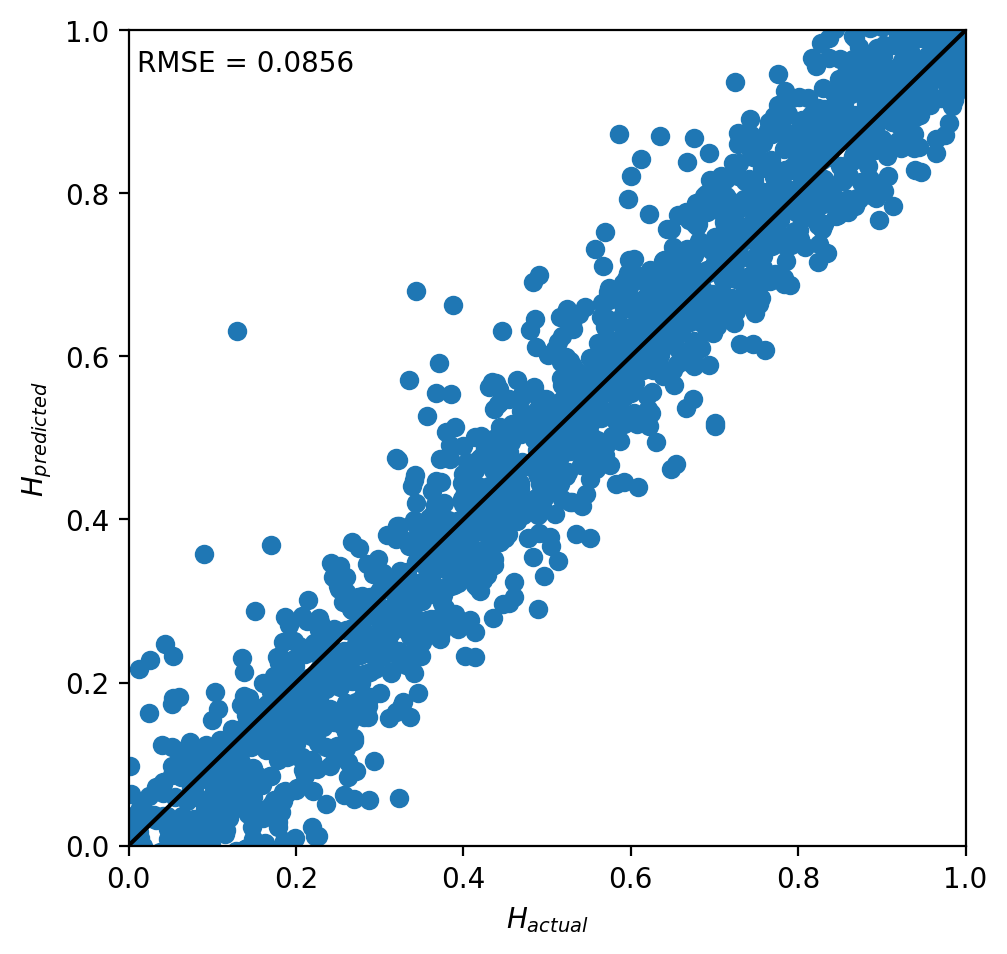

In [7]:
plt.figure(figsize = (1080/200,1080/200), dpi = 200)
plt.scatter(H_actual,H_predicted)
plt.text(0.01, 0.95, 'RMSE = '+ '{:.3g}'.format(np.sqrt(val_loss)))
plt.plot([0,1],[0,1],c='k')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.show()

In [35]:
H=0.0
X = ss.fBm(2000, 2, H, exp = False)
X = X[:1000,:1000]

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


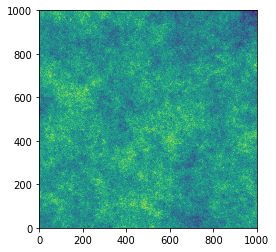

In [37]:
plt.figure()
plt.imshow(X,origin='lower')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:51<00:00,  1.71s/it]


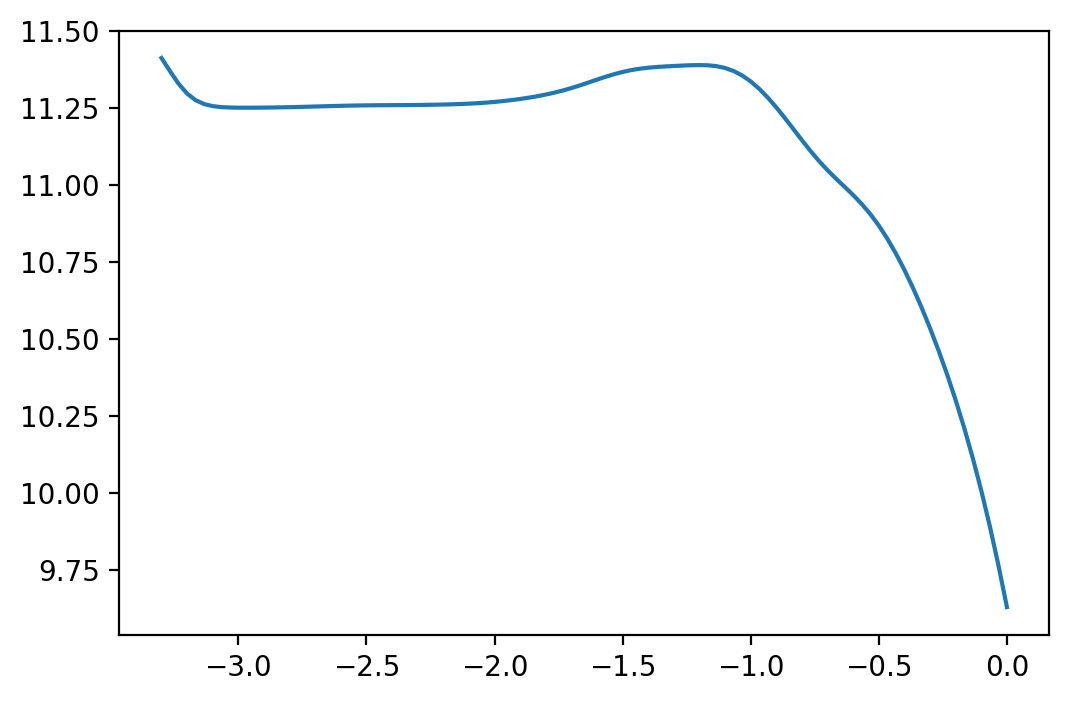

In [38]:
deltavar = [dv.DeltaVar(X,l,v,periodicity =False) for l in tqdm(L)]

plt.figure(dpi=200)
plt.plot(np.log10(L),np.log10(deltavar))
plt.show()

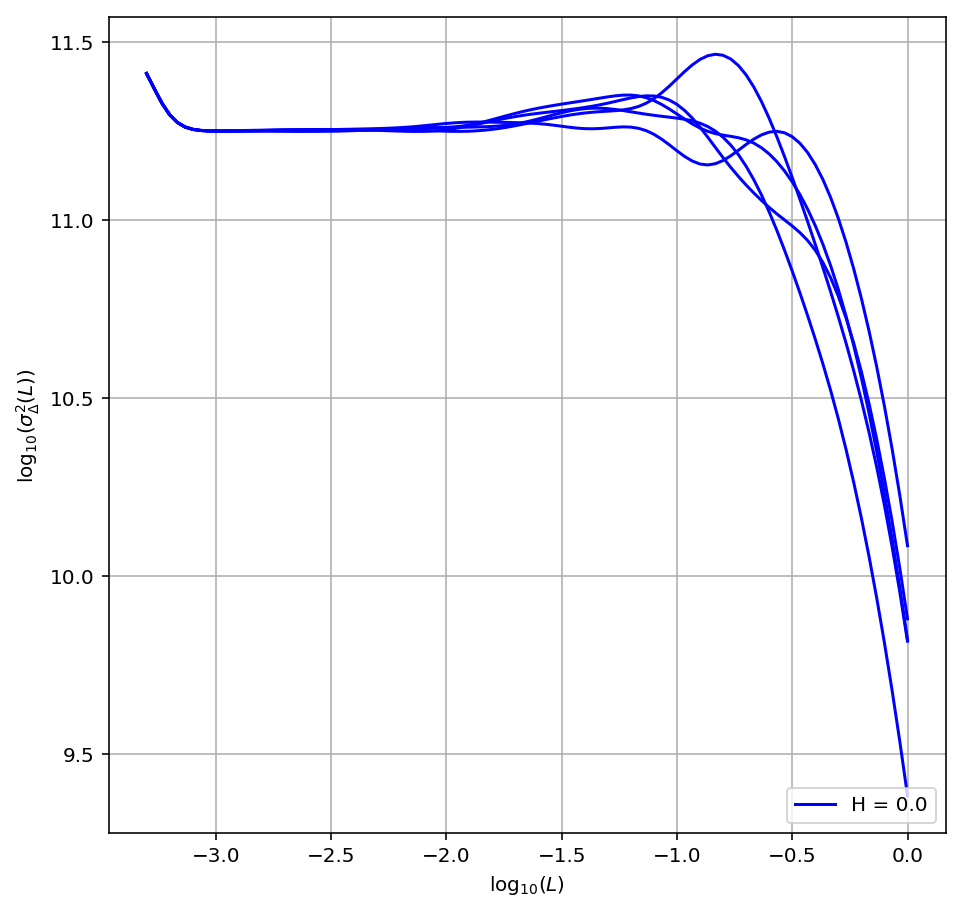

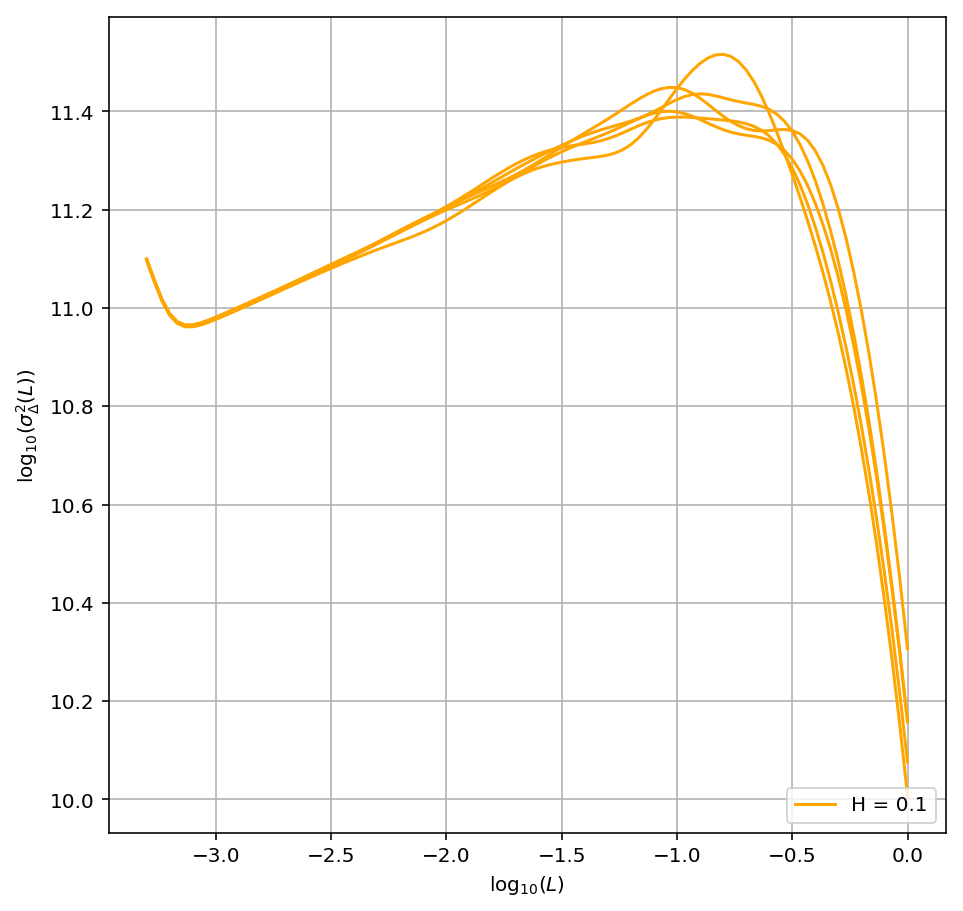

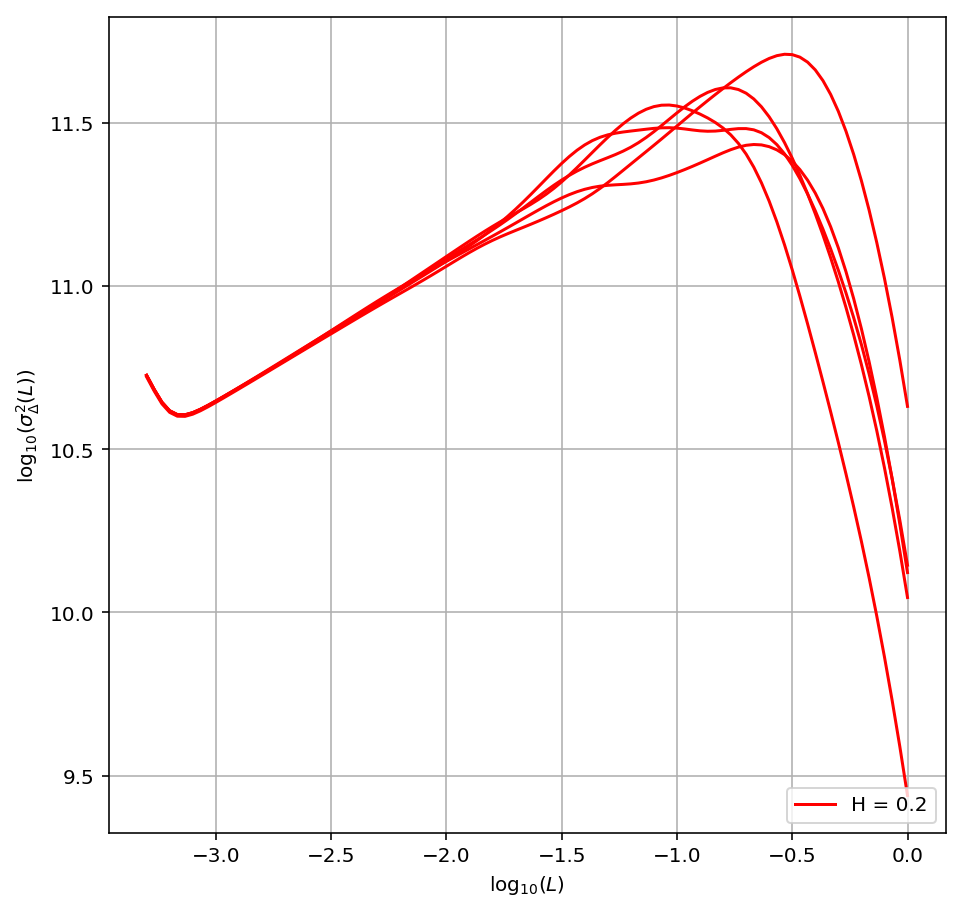

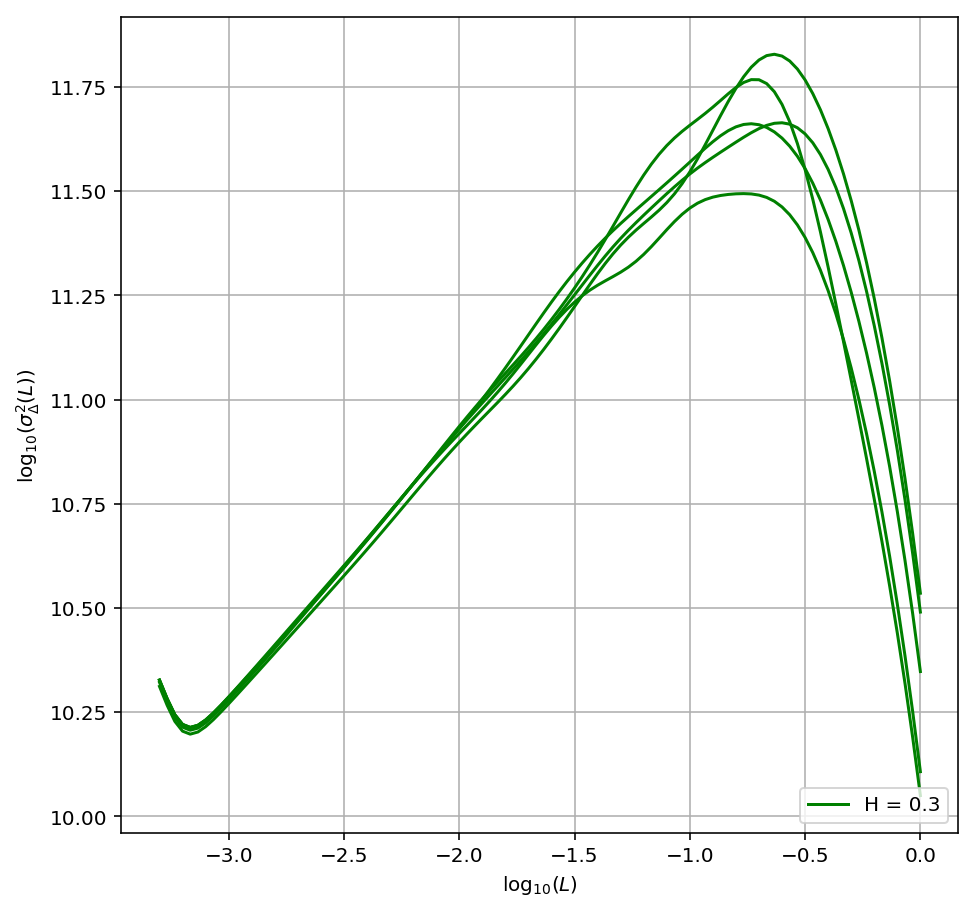

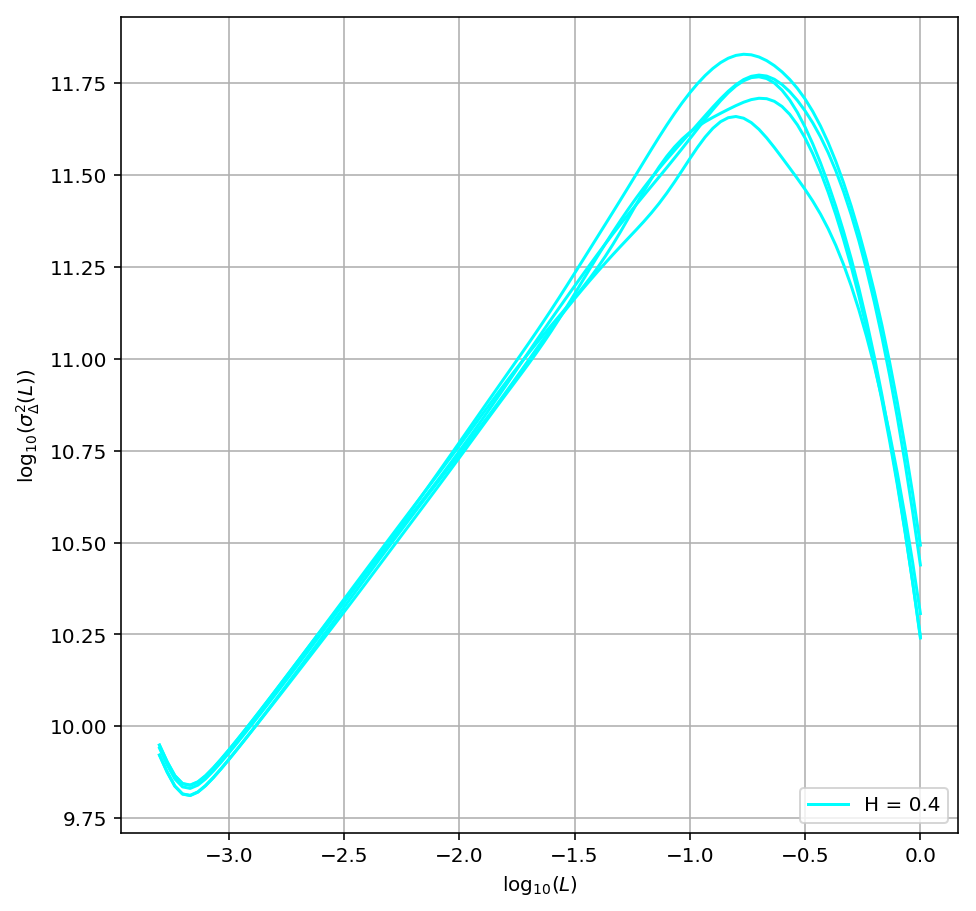

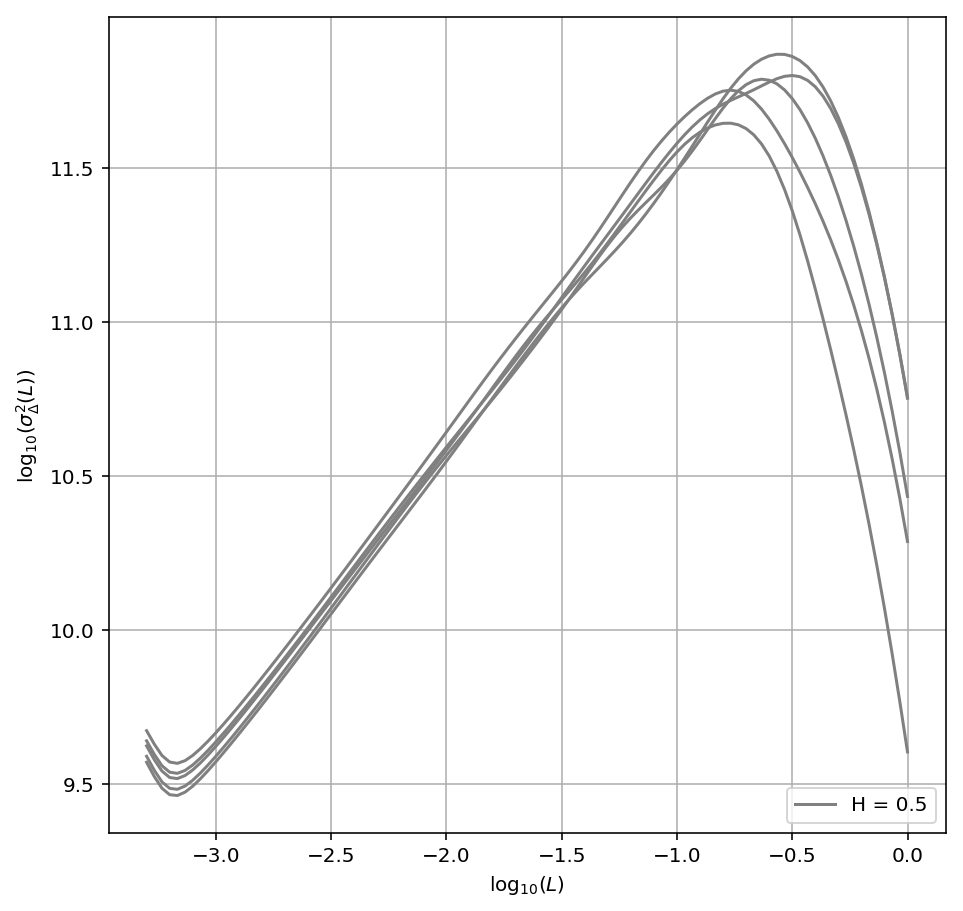

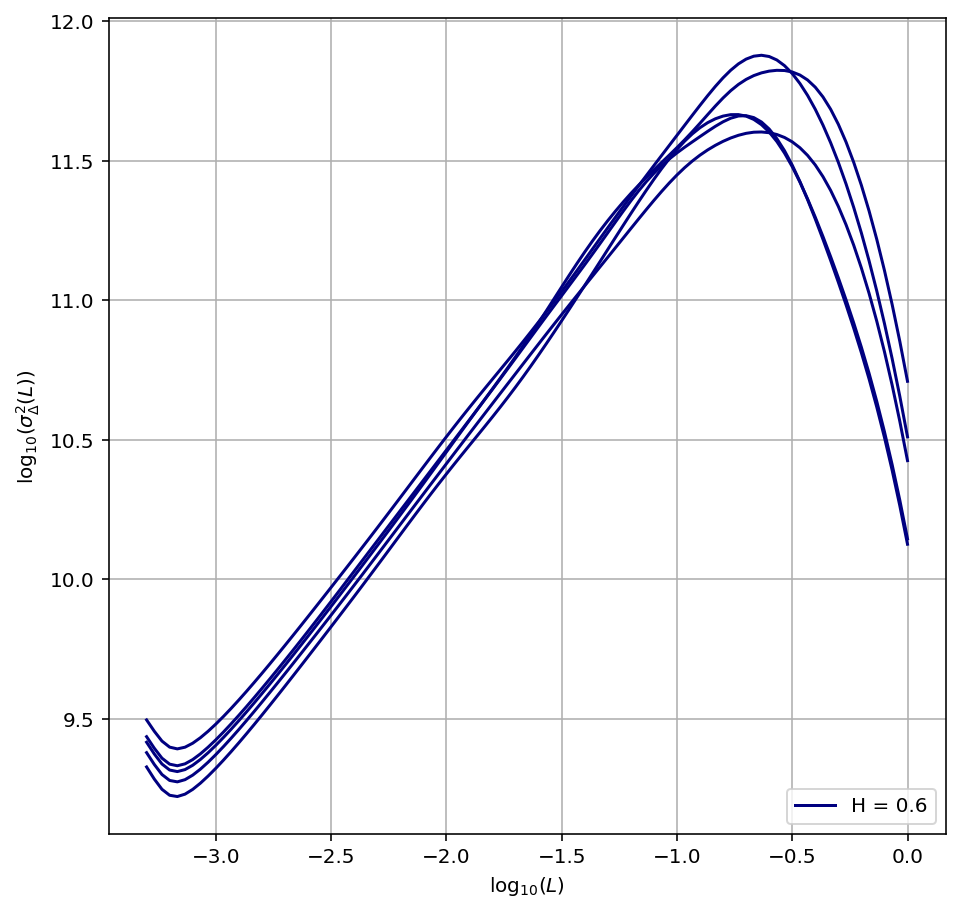

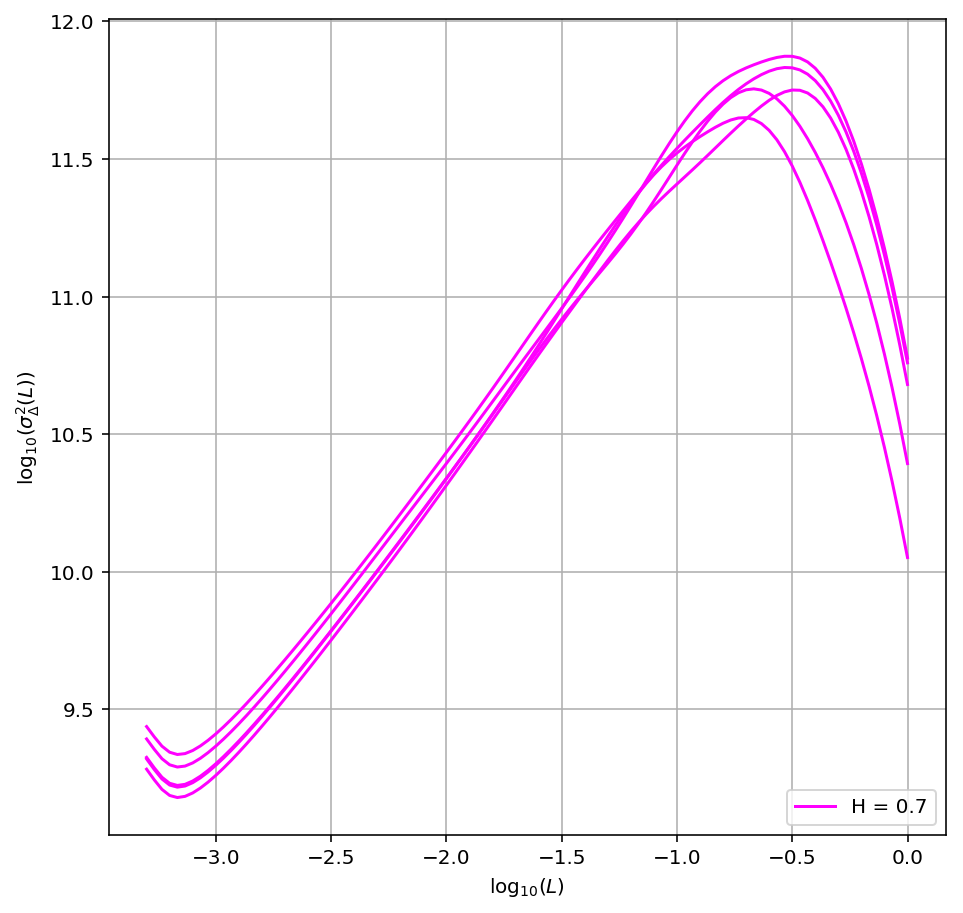

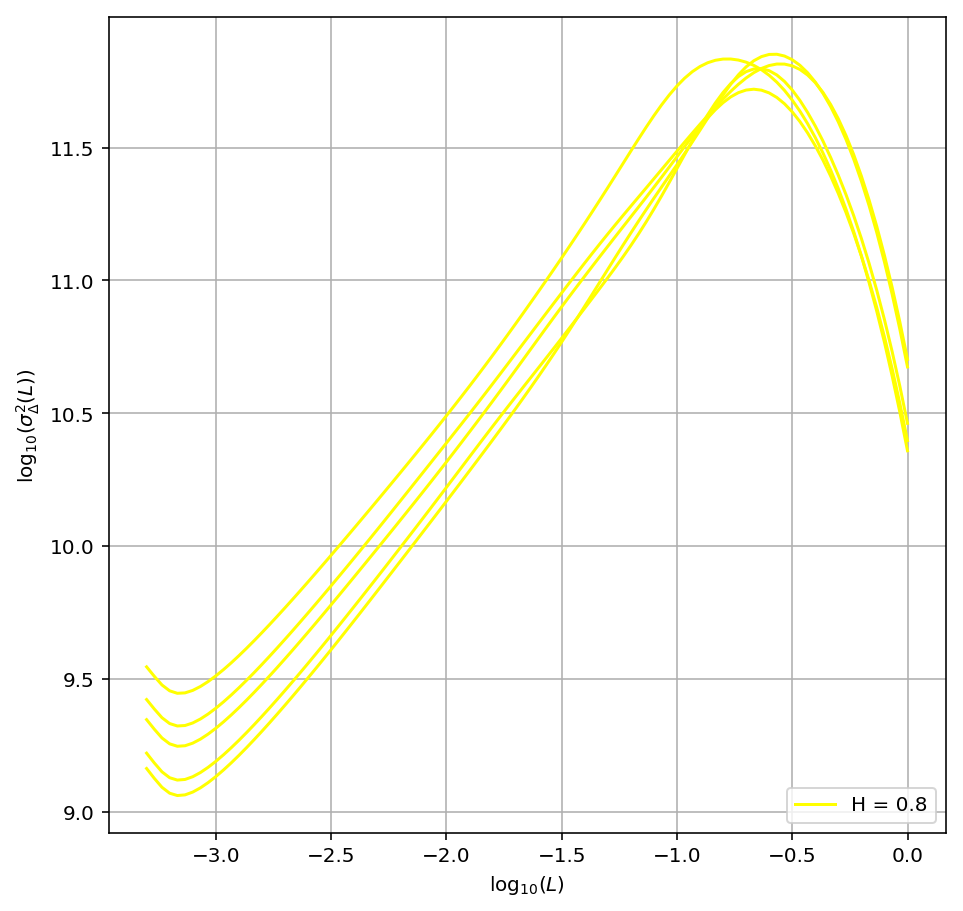

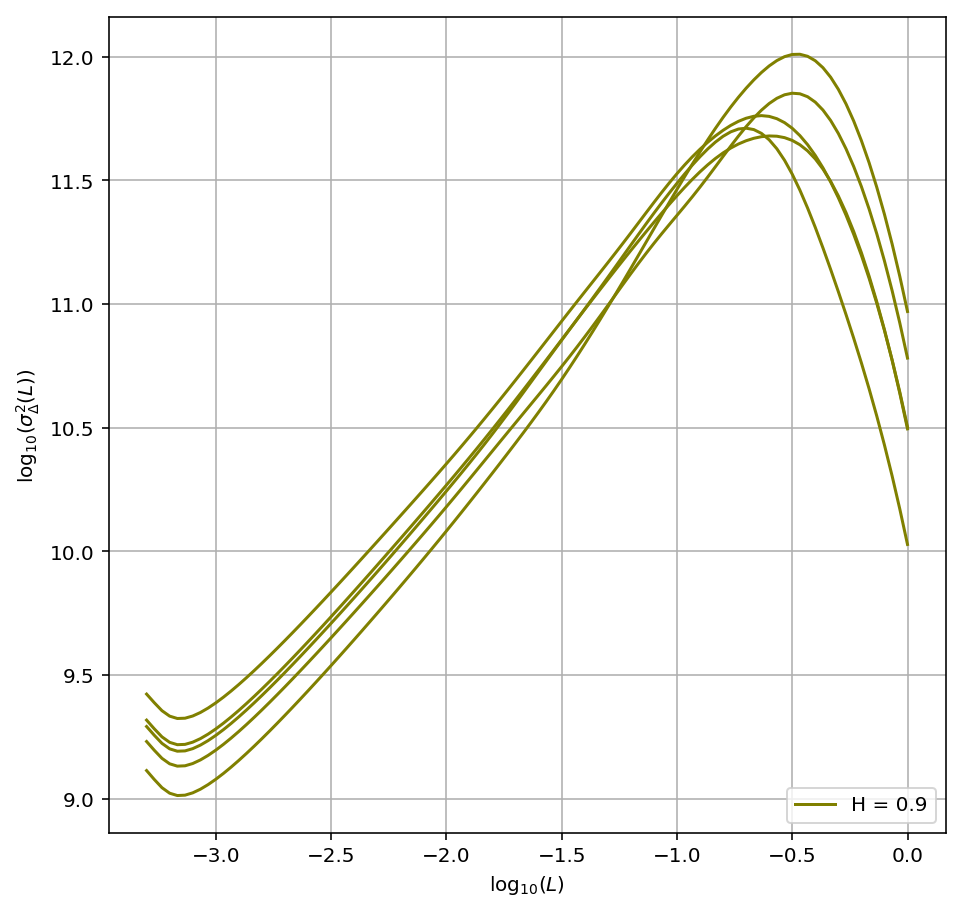

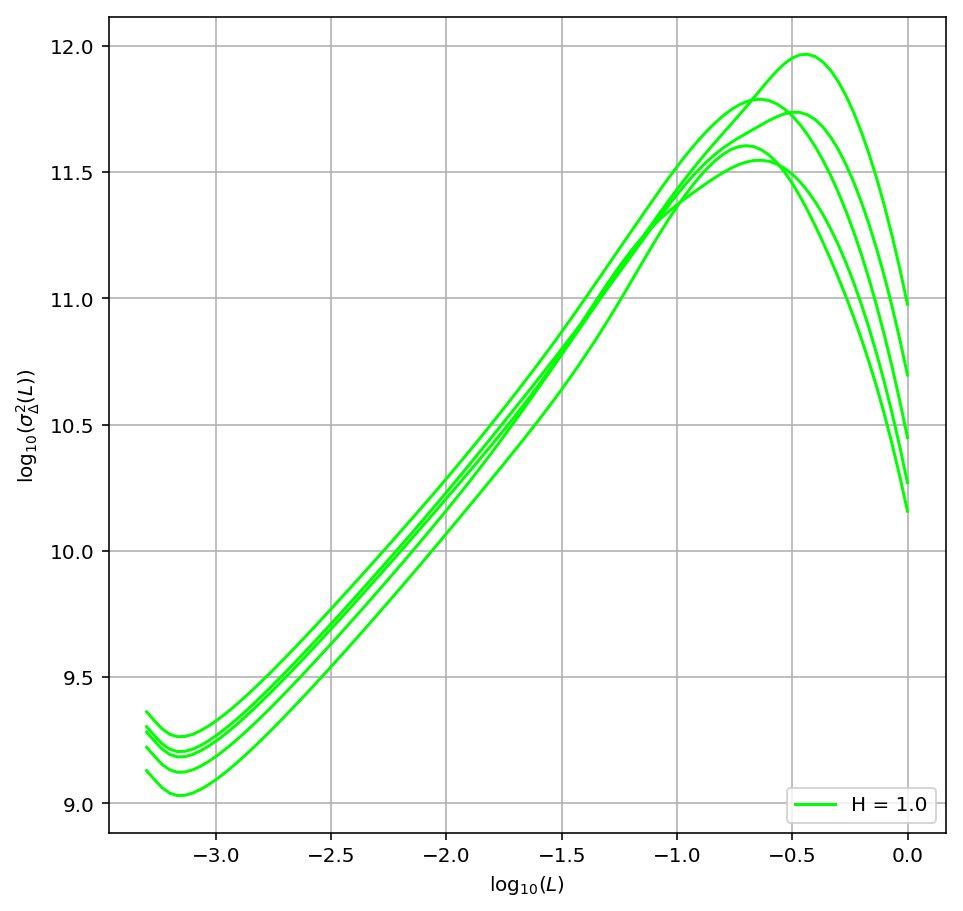

In [105]:
plt.figure(figsize=(1080/144,1080/144),dpi=144)
colors = ['b', 'orange', 'r', 'green', 'cyan', 'gray', 'navy', 'magenta', 'yellow', 'olive', 'lime','purple']
for i in range(11):
    plt.figure(figsize=(1080/144,1080/144),dpi=144)
    for j in range(5):
        plt.plot(np.log10(L),np.log10(deltavar[i][j,:]), label = 'H = ' +str(H[i]), c = colors[i])
    plt.xlabel(r'$\log_{10}(L)$')
    plt.ylabel(r'$\log_{10}(\sigma^2_\Delta(L))$')
    plt.legend(loc = 4)
    plt.grid()
    frame1 = plt.gca()
    frame1.set_aspect('equal', adjustable='box')
    plt.savefig('../Images/DeltaVarRawNonPeriodic'+'{0:02d}'.format(int(H[i]*10))+'.png')
    plt.show()

In [47]:
print(np.shape(deltavar[0]))

(100, 100)


In [49]:
params = []
for d in range(len(deltavar)):
    params_i = []
    for i in range(len(deltavar[d])):
        params_i.append(dv.HurstEstimator(deltavar[d][i,:],L))
    params_i = np.asarray(params_i)
    params.append(params_i)

print(np.shape(params))        

(11, 100, 6)


In [51]:
print(params[0][:,0])

[-0.00216548 -0.00216552 -0.00216568 -0.00216586 -0.00216453 -0.00216576
 -0.00216623 -0.00216696 -0.00216577 -0.0021653  -0.00216679 -0.00216562
 -0.00216626 -0.00216523 -0.00216557 -0.00216504 -0.00216452 -0.00216556
 -0.00216686 -0.00216532 -0.00216665 -0.00216541 -0.00216627 -0.00216618
 -0.00216522 -0.0021672  -0.00216538 -0.00216465 -0.00216451 -0.00216536
 -0.00216555 -0.00216581 -0.00216595 -0.002167   -0.00216456 -0.00216635
 -0.00216561 -0.0021656  -0.0021661  -0.00216568 -0.00216621 -0.00216582
 -0.00216485 -0.0021663  -0.00216493 -0.00216557 -0.00216498 -0.00216555
 -0.00216584 -0.00216556 -0.00216496 -0.00216608 -0.00216493 -0.00216454
 -0.00216491 -0.00216646 -0.00216634 -0.00216658 -0.00216593 -0.00216546
 -0.00216542 -0.00216505 -0.00216665 -0.00216529 -0.002165   -0.00216626
 -0.00216599 -0.00216547 -0.002165   -0.00216623 -0.00216506 -0.00216616
 -0.00216648 -0.00216592 -0.00216498 -0.00216478 -0.00216565 -0.00216651
 -0.00216459 -0.00216671 -0.00216595 -0.00216577 -0

In [52]:
[np.savetxt('../Data/H_estVSsigma/H_params_s'+'{0:02d}'.format(int(H[i]*10))+'.txt',params[i],header = 'H,H_std,A,A_std,B,B_std with H = '+str(H[i])) for i in range(len(H))]

[None, None, None, None, None, None, None, None, None, None, None]

In [53]:
np.savetxt('../Data/H_estVSsigma/L.txt',L,header = 'Kernel Lengthscale used when calculating DeltaVariance')